<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

В некоторых методах/функциях есть элемент рандома, поэтому для воспроизводимости и более быстрой проверки используются сиды (например дефолт 42 по всем известной книге)


# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
# Скачаем файл на пк для проверки в fastapi позже
!pip install requests

import requests

test_url = 'https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv'

def download_file(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as file:
        file.write(response.content)

download_file(test_url, 'cars_test.csv')

### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [5]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [6]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [7]:
df_train.info()
# df_train = df_train.dropna()
print()
df_test.info()
# df_test = df_test.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------       

Видим пропуски в столбцах ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [8]:
print(df_train.shape, df_train.drop_duplicates().shape)

print(df_test.shape, df_test.drop_duplicates().shape)

df_train = df_train.drop_duplicates()

(6999, 13) (6014, 13)
(1000, 13) (938, 13)


Также видим пропуски в трейне и тесте

Удалим дубликаты только из трейна, так как дубликаты в тесте не повлияют на обучение модели



In [9]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [10]:
!pip install ydata-profiling

from ydata_profiling import ProfileReport

PR = ProfileReport(df_train)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a1d65c0a2529bcdca63600eac626fb2c90ae1acc53d3abe9a9195dfe66a30e15
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [11]:
PR

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
PR.to_file('PR2.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Выводы
- Присутствуют данные об автомобилях с 1994 по 2020 года, большая часть автомобилей была произведена в течении 10 последних лет
- Цена от 31к до 6млн, подавляющее большинство машин до 1.5млн
- 4 вида топлива - Diesel и Petrol занимают 99% рынка
- 3 вида продавцов, где большинство частники (дисбаланс классов)
- Большинство машин - механика
- Высокая корреляция между признаками: selling_price, year, km_driven

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [13]:
dc_train = df_train.describe()
dc_train



year  selling_price     km_driven        seats
count  6014.000000   6.014000e+03  6.014000e+03  5824.000000
mean   2013.447456   5.219820e+05  7.376415e+04     5.437672
std       4.079920   5.338426e+05  5.961075e+04     0.991755
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.500000e+05  3.900000e+04     5.000000
50%    2014.000000   4.099990e+05  7.000000e+04     5.000000
75%    2017.000000   6.400000e+05  1.000000e+05     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [14]:
dc_test = df_test.describe()
dc_test

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [15]:
df_train.describe(include=['object'])


name    fuel seller_type transmission        owner  \
count                     6014    6014        6014         6014         6014   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       107    3269        5394         5505         3721   

          mileage   engine max_power          torque  
count        5824     5824      5827            5823  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          184      795       282             417

In [16]:
df_test.describe(include=['object'])


name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

In [17]:
df_train.describe().loc[['mean', '50%']] - df_test.describe().loc[['mean', '50%']]


year  selling_price    km_driven     seats
mean -0.233544  -95919.012402  2370.808651  0.026866
50%   0.000000  -25000.000000  8500.000000  0.000000

Посмотрим на дельту изменений среднего и медианы у трейна и теста. Видим, что значения примерно похожи.

### **Задание 3 (0.2 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [18]:
df_train.drop(columns='selling_price').shape, df_train.drop(columns='selling_price').drop_duplicates().shape

((6014, 12), (5840, 12))

In [19]:
len(df_train[df_train.drop(columns='selling_price').duplicated()])

174

In [20]:
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')

In [21]:
df_train = df_train.reset_index(drop=True)

Всего в данных 174 дубликатов с различными ценами. Учитывая, что полные дубликаты я удалил

In [22]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [23]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [24]:
def to_num(df, column_name, units):
  for i in units:
    df[column_name] = df[column_name].str.replace(f' {i}', '')

  df[column_name] = pd.to_numeric(df[column_name])
  return df

df_test = to_num(df_test, 'mileage', ['kmpl', 'km/kg'])
df_train = to_num(df_train, 'mileage', ['kmpl', 'km/kg'])

In [25]:
df_test = to_num(df_test, 'engine', ['CC'])
df_train = to_num(df_train, 'engine', ['CC'])

In [26]:
df_test = to_num(df_test, 'max_power', ['bhp'])
df_train = to_num(df_train, 'max_power', ['bhp'])

In [27]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

In [28]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

In [29]:
df_train.head(5)

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52   
2  Individual       Manual   First Owner    23.00  1396.0      90.00   
3  Individual       Manual   First Owner    16.10  1298.0      88.20   
4  Individual       Manual   First Owner    20.14  1197.0      81.86   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [30]:
import re

def process_torque(df):
  torque_vals = []
  rpm_vals = []

  for i in df['torque']:
    if pd.isna(i):
      torque_vals.append(i)
      rpm_vals.append(i)
      continue

    elif not isinstance(i, str):
      print(i)
      torque_vals.append(None)
      rpm_vals.append(None)
      continue


    i = i.replace(',', '')

    torque_match = re.search(r"(\d+(\.\d+)?)\s*(Nm|kgm|)", i, re.IGNORECASE)

    if torque_match:
      torque_value = float(torque_match.group(1))
      unit = torque_match.group(3).lower()

      if unit == 'kgm':
        torque_value *= 9.80665
        # 1 kgm ≈ 9.80665 Nm
    else:
      torque_value = None

    rpm_match = re.search(r"@ (\d{1,4})(?:-(\d{1,4}))?\s?(rpm\s?|\(kgm@ rpm\)\s?)", i)
    fallback_match = re.search(r"(\d{1,4})\s?(rpm|RPM)?\s*$", i)



    if fallback_match:
      rpm = fallback_match.group(1)

    elif rpm_match:
      if rpm_match.group(2):
        rpm = rpm_match.group(2)
      else:
        rpm = rpm_match.group(1)

    else:
      rpm = None

    torque_vals.append(torque_value)
    rpm_vals.append(rpm)

  df['torque'] = torque_vals
  df['max_torque_rpm'] = rpm_vals
  return df

In [31]:
df_train = process_torque(df_train.copy())

df_train['torque'] = pd.to_numeric(df_train['torque'])
df_train['max_torque_rpm'] = pd.to_numeric(df_train['max_torque_rpm'])

In [32]:
df_test = process_torque(df_test.copy())

df_test['torque'] = pd.to_numeric(df_test['torque'])
df_test['max_torque_rpm'] = pd.to_numeric(df_test['max_torque_rpm'])

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5654 non-null   float64
 9   engine          5654 non-null   float64
 10  max_power       5656 non-null   float64
 11  torque          5653 non-null   float64
 12  seats           5654 non-null   float64
 13  max_torque_rpm  5637 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


In [34]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52   
2  Individual       Manual   First Owner    23.00  1396.0      90.00   
3  Individual       Manual   First Owner    16.10  1298.0      88.20   
4  Individual       Manual   First Owner    20.14  1197.0      81.86   

      torque  seats  max_torque_rpm  
0  190.00000    5.0          2000.0  
1  250.00000    5.0          2500.0  
2  219.66896    5.0          2750.0  
3   11.50000    5.0          4500.0  
4  113.75000    5.0          4000.0

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         981 non-null    float64
 9   engine          981 non-null    float64
 10  max_power       981 non-null    float64
 11  torque          981 non-null    float64
 12  seats           981 non-null    float64
 13  max_torque_rpm  974 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


In [36]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner  mileage  engine  max_power  \
0  Diesel  Individual       Manual   First Owner     14.0  2498.0      112.0   
1  Diesel  Individual       Manual   First Owner     21.5  1497.0      108.5   
2  Petrol  Individual    Automatic   First Owner     12.9  1799.0      130.0   
3  Diesel  Individual       Manual   First Owner     25.1  1498.0       98.6   
4  Petrol  Individual       Manual  Second Owner     16.5  1172.0       65.0   

   torque  seats  max_torque_rpm  
0   260.0    7.0          2200.0  
1   260.0    5.0          2750.0  
2   172.0    5.0          4300.0  
3   200.0    5.0          1750.0  
4    96.0    5.0             NaN

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [37]:
train_medians = df_train[['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']].median()

df_train.fillna(train_medians, inplace=True)
df_test.fillna(train_medians, inplace=True)

In [38]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   float64
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 # 

- Стоит применять медиану так как она берет медианное значение, то есть сильные выбросы не будут искажать наши данные. Можно использовать среднее если нет сильных выбросов

- По тренировочным данным для train и test

Так как мы не знаем какие у нас будут тест данные в проде, то все preprocessing должны обучаться и трансформить на трейне, а на тесте только трансформить

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [39]:
df_train['engine'] = df_train['engine'].astype('int')
df_train['seats'] = df_train['seats'].astype('int')

df_test['engine'] = df_test['engine'].astype('int')
df_test['seats'] = df_test['seats'].astype('int')

In [40]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int64  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 # 

Seats можно (а скорее нужно) рассмотреть как категариальную фичу, так как у нас есть не такое большое кол-во уникальных значений и по сути их нельзя так грубо сравнивать друг с другом (то есть 2 сиденья конечно < чем 4, но в целом это скорее можно рассматривать как разные категории машин)

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [41]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   163.590103     5.426712     3038.374658  
std      31.640418    89.674071     0.982344      881.622066  
min       0.000000     5.700000     2.000000      500.000000  
25%      68.000000   102.000000     5.000000     2250.000000  
50%      81.860000   153.000000     5.000000     3000.000000  
75%      99.000000   200.000000     5.000000     4000.000000  
max     400.000000   789.000000    14.000000     5300.000000

In [42]:
df_test.describe()

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power       torque        seats  max_torque_rpm  
count  1000.000000  1000.000000  1000.000000     1000.000000  
mean     90.841670   168.395914     5.403000     3091.776000  
std      34.893389    93.660860     0.912921      883.676358  
min      34.200000     7.800000     4.000000      500.000000  
25%      69.000000   104.000000     5.000000     2500.000000  
50%      82.425000   153.000000     5.000000     3000.000000  
75%     102.000000   205.000000     5.000000     4000.000000  
max     280.000000   620.000000     9.000000     5200.000000

Заполнение пропусков действительно может изменить распределение, но так как у нас их было очень мало, менее 3%, то каких-то глобальных изменений быть не должно. Тем более, что мы брали медиану, такое преобразование может максимум немного усреднить распределение

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

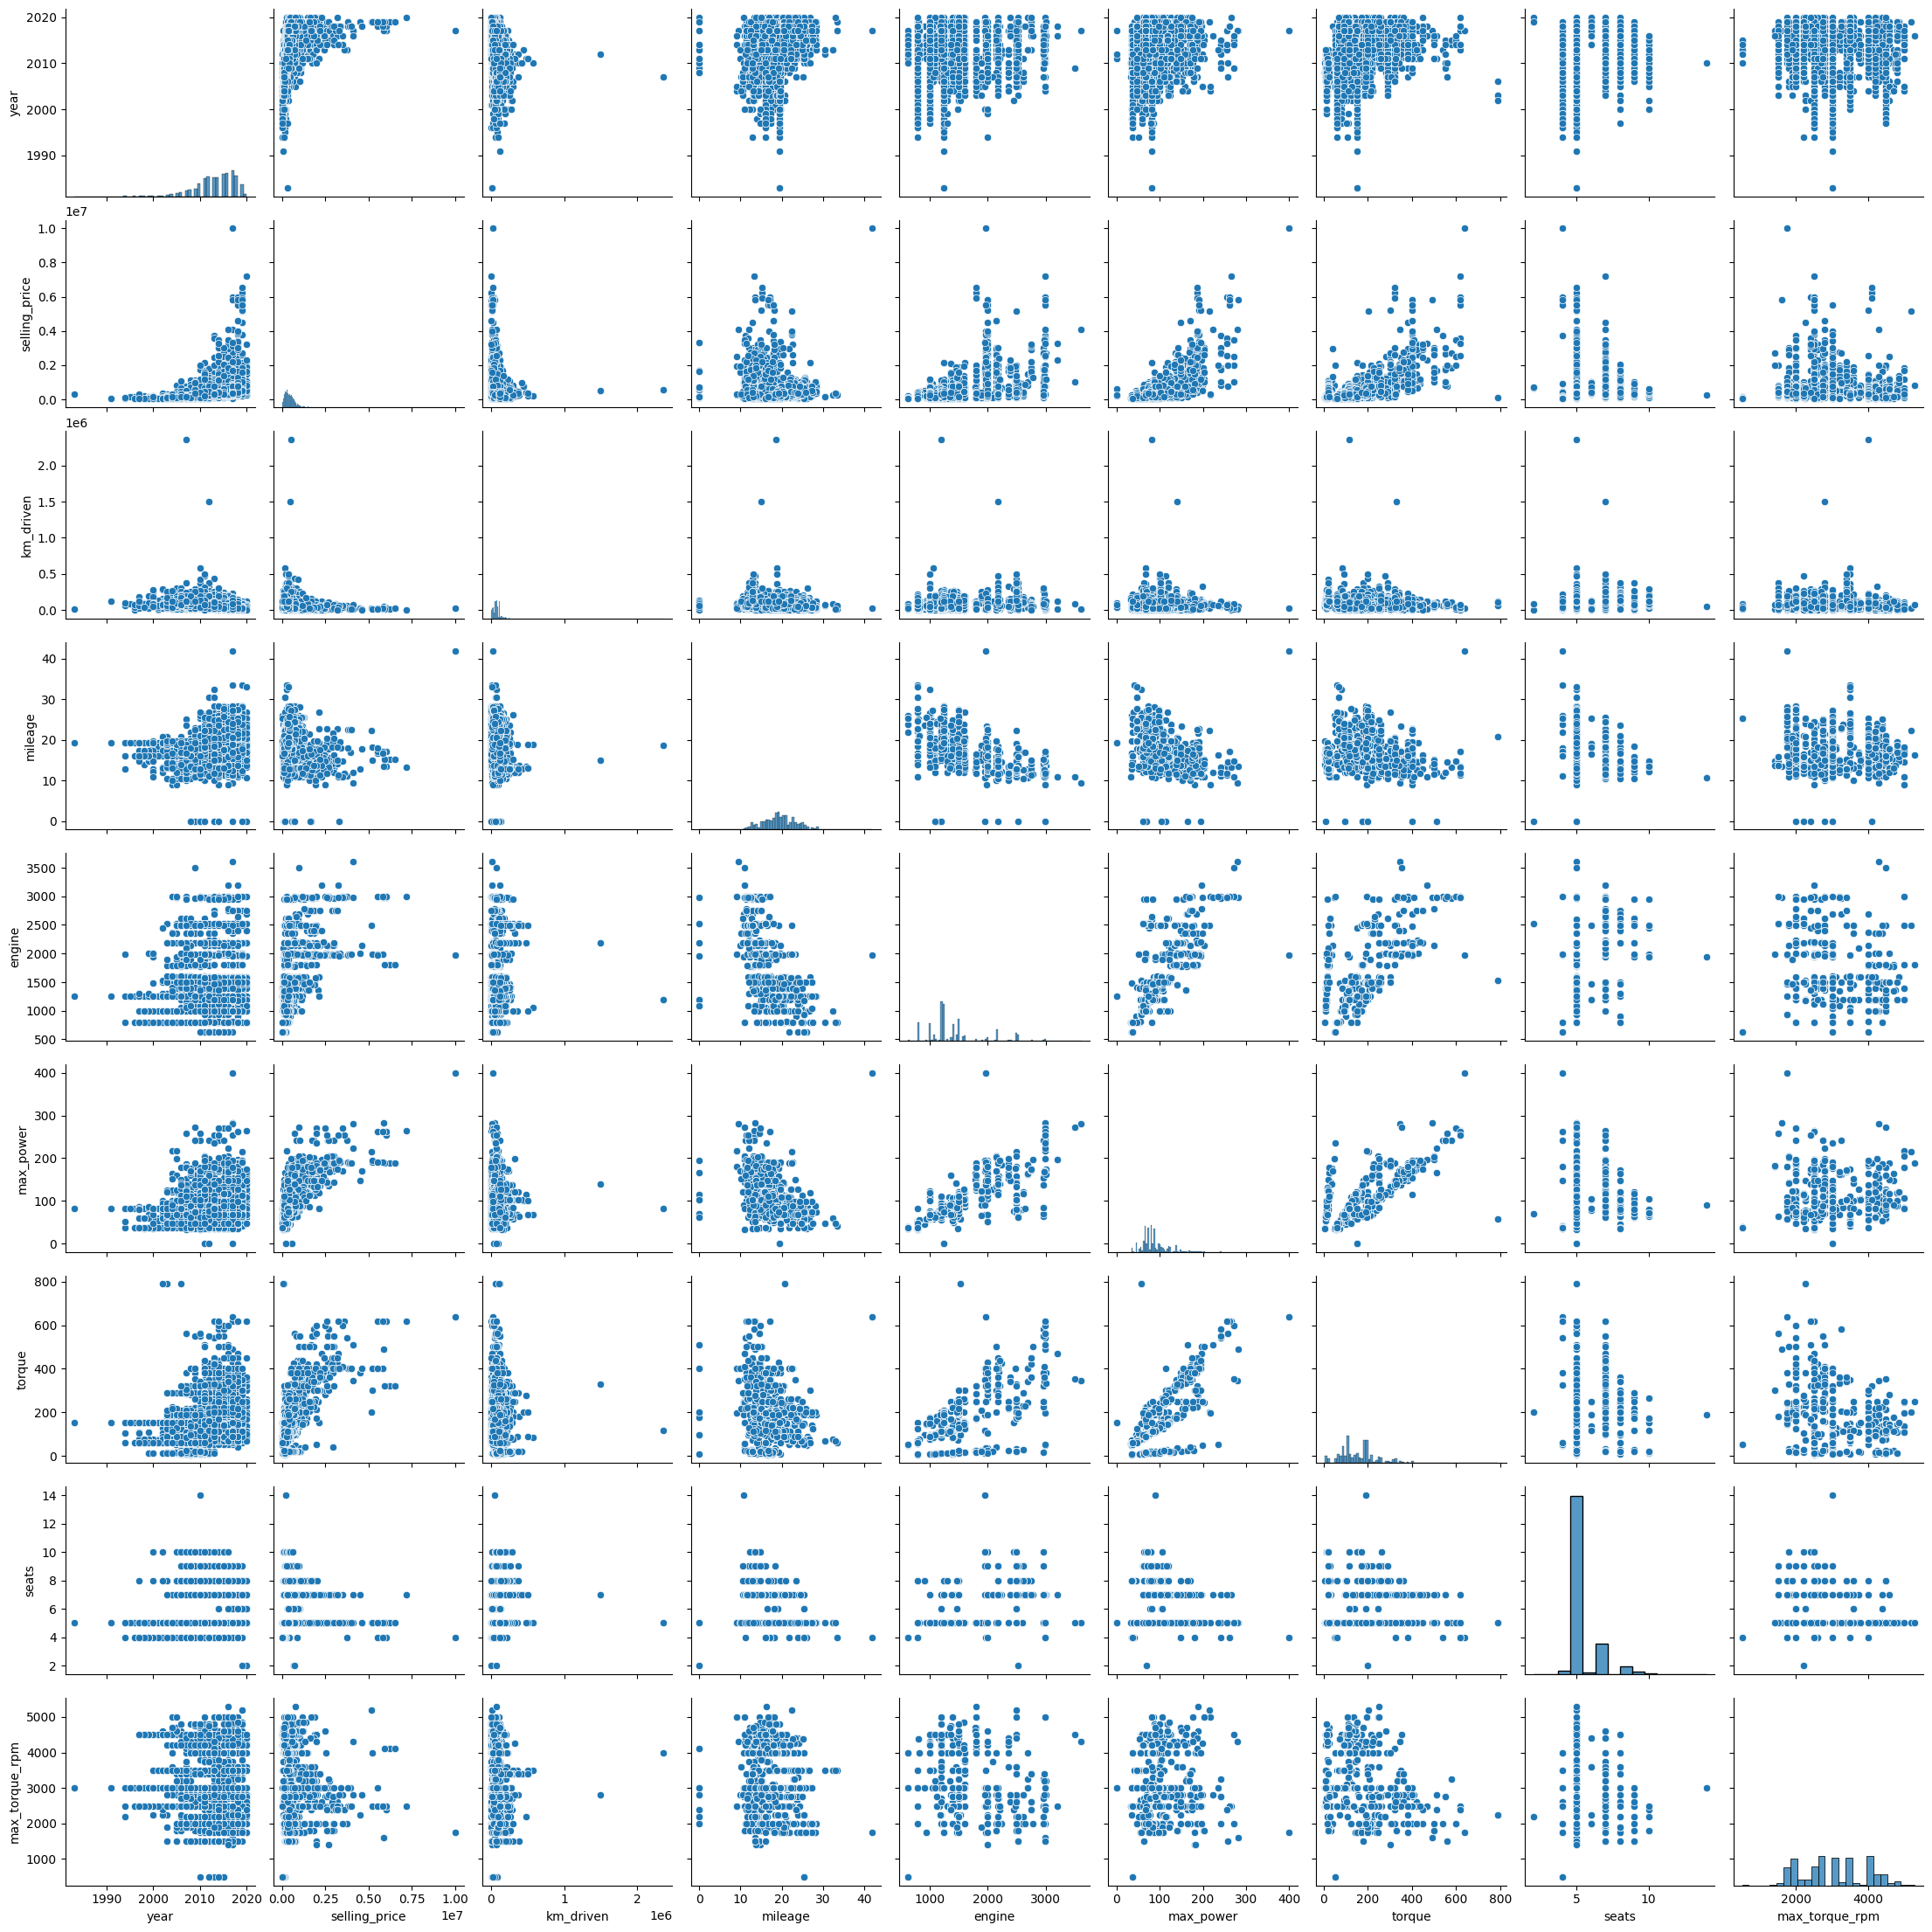

In [43]:
sns.pairplot(df_train, height=2.5)


- Можно ли предположить на основе распределений связь признаков с целевой переменной?

  Конечно можно, однако не факт, что она подтвердится. Данный способ помогает лучше выявлять зависимости к целевой переменной

- Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

  Также можно, однако стоит проверять


Гипотезы:

Можно предположить, что целевая переменная коррелирует с признаками:
- year
- km_driven
- engine
- max_power
- torque
- seats

Это можно увидеть по графику

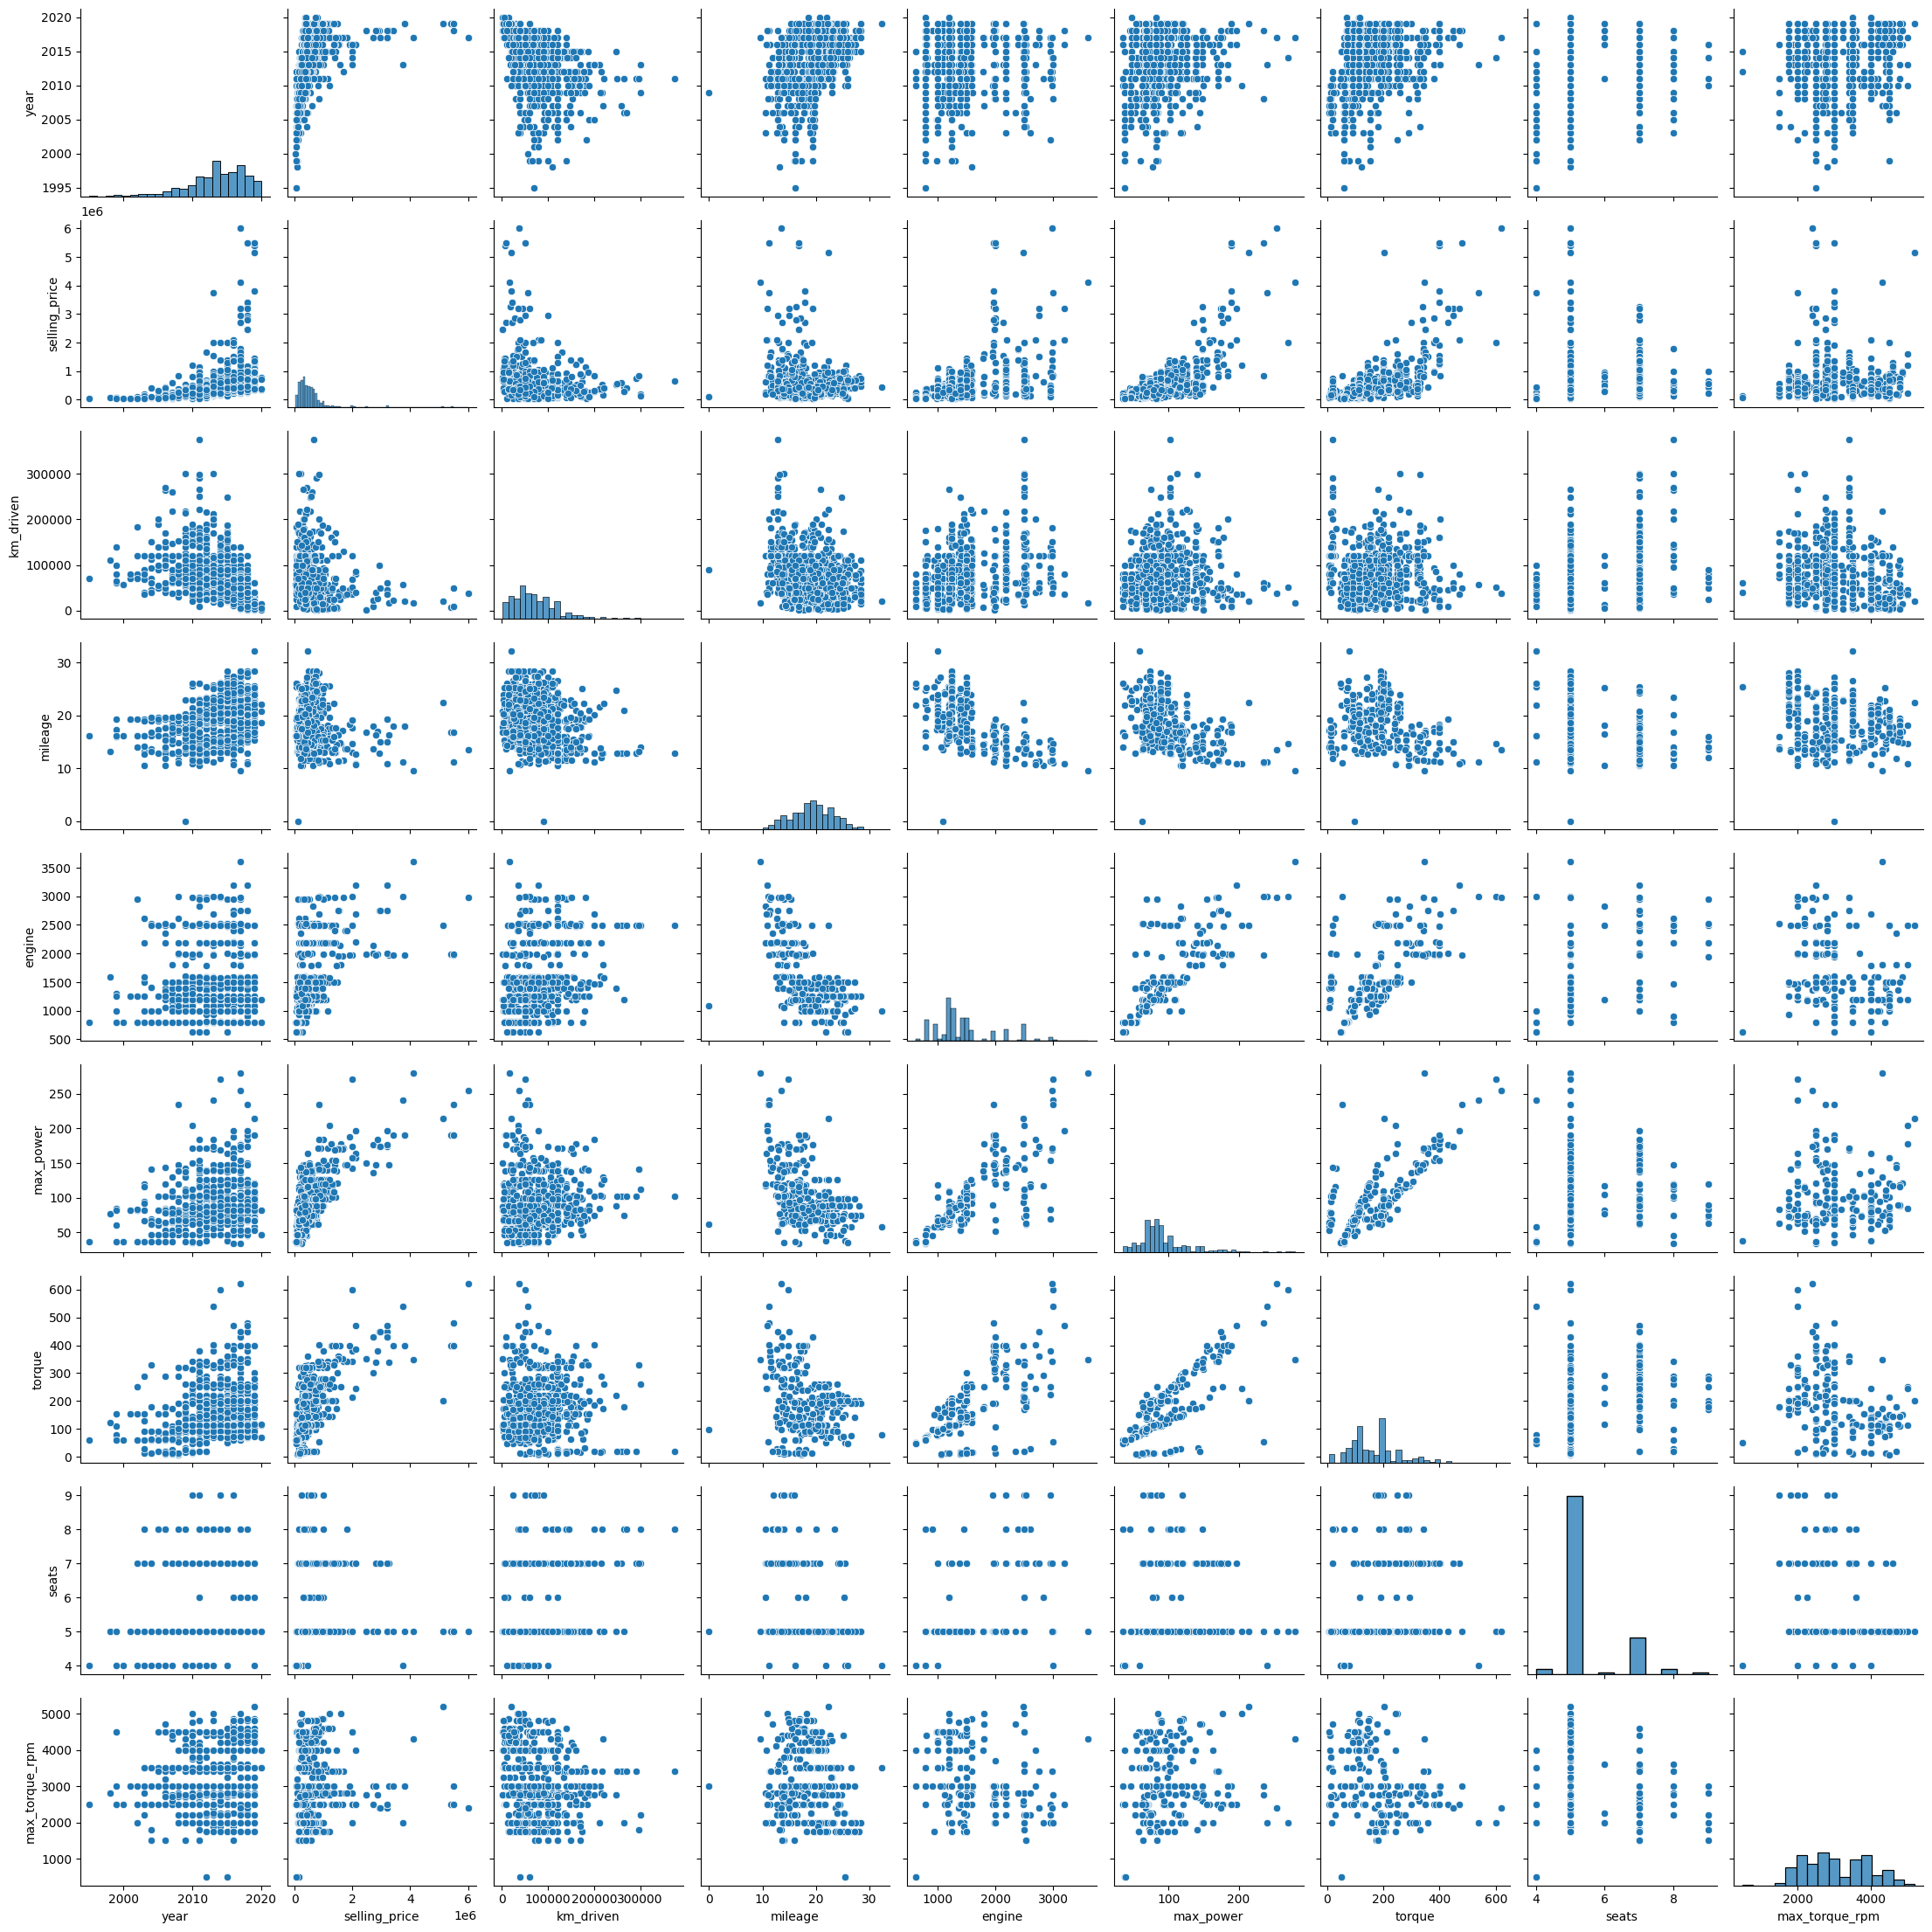

In [44]:
sns.pairplot(df_test, height=2.5)


Распределения у трейна и теста отличаются, но в целом сильно схожи

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [45]:
correlation_pirson = df_train.select_dtypes(include=[float, int]).corr()
correlation_pirson

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price   0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven      -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage         0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine          0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power       0.156858       0.692814   0.024588 -0.373390  0.681117   
torque          0.233161       0.612198   0.048861 -0.134693  0.618925   
seats           0.041178       0.149953   0.192328 -0.451059  0.652172   
max_torque_rpm  0.057781      -0.084850  -0.213920 -0.190450 -0.247078   

                max_power    torque     seats  max_torque_rpm  
year             0.156858  0.233161  0.041178        0.057781  
selling_price    0.692814  0.612198  0.149953       -0.084850  
km_driven        0.024588  0.048861  0.192328       -0.213920  
mileage         -0.373390 -0.134693 -0.451059       -0.190450  
engine           0.681117  0.618925  0.652172       -0.247078  
max_power        1.000000  0.758072  0.244112       -0.011829  
torque           0.758072  1.000000  0.306240       -0.397104  
seats            0.244112  0.306240  1.000000       -0.210696  
max_torque_rpm  -0.011829 -0.397104 -0.210696        1.000000

<Axes: >

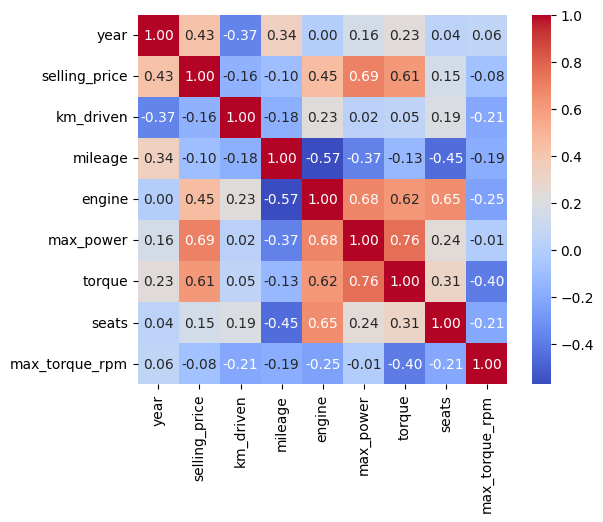

In [46]:
sns.heatmap(correlation_pirson, annot=True, cmap='coolwarm', fmt=".2f", square=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- engine и year наименее скоррелированы между собой (0.00) это вообще нулевая корреляция
- Сильная положительная между torque и max_power (0.76), а также между max_power и selling_price (0.69)
- По сути да (но исключения все равно будут), видим отрицательную корреляцию (-0.37), то есть чем новее машина, тем меньше пробег и наоборот

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [47]:
def spirman_corr(x, y):
  x_rank = np.argsort(np.argsort(x))
  y_rank = np.argsort(np.argsort(y))

  d = x_rank - y_rank
  n = len(x)

  res = 1 - (6 * np.sum(d**2)) / (n * (n**2 - 1))
  return res

In [48]:
def calculate_spearman_correlation_matrix(df):
    def spirman_corr(x, y):
      x_rank = np.argsort(np.argsort(x))
      y_rank = np.argsort(np.argsort(y))

      d = x_rank - y_rank
      n = len(x)

      res = 1 - (6 * np.sum(d**2)) / (n * (n**2 - 1))
      return res


    spearman_corr_matrix = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])),
                                        columns=df.columns, index=df.columns)

    for c_1 in df.columns:
        for с_2 in df.columns:
            if c_1 == с_2:
                spearman_corr_matrix.loc[c_1, с_2] = 1.0
            else:
                spearman_corr_matrix.loc[c_1, с_2] = spirman_corr(df[c_1].values, df[с_2].values)

    return spearman_corr_matrix

spearman_corr_matrix = calculate_spearman_correlation_matrix(df_train.select_dtypes(include=[float, int]))
print(spearman_corr_matrix)

                    year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.705060  -0.566218  0.342960 -0.034677   
selling_price   0.705060       1.000000  -0.295699  0.026164  0.461866   
km_driven      -0.566218      -0.295699   1.000000 -0.197687  0.303411   
mileage         0.342960       0.026164  -0.197687  1.000000 -0.428987   
engine         -0.034677       0.461866   0.303411 -0.428987  1.000000   
max_power       0.166875       0.612352   0.040464 -0.308684  0.711526   
torque          0.227351       0.607969   0.130959 -0.036513  0.701086   
seats           0.050485       0.220670   0.105454 -0.307221  0.361660   
max_torque_rpm  0.074538      -0.122756  -0.314958 -0.182088 -0.362979   

                max_power    torque     seats  max_torque_rpm  
year             0.166875  0.227351  0.050485        0.074538  
selling_price    0.612352  0.607969  0.220670       -0.122756  
km_driven        0.040464  0.130959  0.105454       -0.314958  
mil

In [49]:
df_train.select_dtypes(include=[float, int]).corr(method='spearman')


year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.707123  -0.569659  0.346132 -0.038056   
selling_price   0.707123       1.000000  -0.295665  0.026186  0.463577   
km_driven      -0.569659      -0.295665   1.000000 -0.198466  0.304504   
mileage         0.346132       0.026186  -0.198466  1.000000 -0.429871   
engine         -0.038056       0.463577   0.304504 -0.429871  1.000000   
max_power       0.165798       0.612258   0.040919 -0.308824  0.713113   
torque          0.226367       0.608595   0.131765 -0.036187  0.703161   
seats           0.048291       0.317605   0.195317 -0.435458  0.527716   
max_torque_rpm  0.077014      -0.122324  -0.316899 -0.184077 -0.365479   

                max_power    torque     seats  max_torque_rpm  
year             0.165798  0.226367  0.048291        0.077014  
selling_price    0.612258  0.608595  0.317605       -0.122324  
km_driven        0.040919  0.131765  0.195317       -0.316899  
mileage         -0.308824 -0.036187 -0.435458       -0.184077  
engine           0.713113  0.703161  0.527716       -0.365479  
max_power        1.000000  0.694927  0.304857       -0.019601  
torque           0.694927  1.000000  0.364642       -0.481803  
seats            0.304857  0.364642  1.000000       -0.192960  
max_torque_rpm  -0.019601 -0.481803 -0.192960        1.000000

Мы видим некоторую погрешность, но в целом результаты сходятся

In [50]:
!pip install phik

In [51]:
from phik import phik_matrix

df_train.phik_matrix()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


name      year  selling_price  km_driven      fuel  \
name            1.000000  0.948995       0.994871   0.000000  1.000000   
year            0.948995  1.000000       0.219841   0.081574  0.205834   
selling_price   0.994871  0.219841       1.000000   0.000000  0.157885   
km_driven       0.000000  0.081574       0.000000   1.000000  0.046285   
fuel            1.000000  0.205834       0.157885   0.046285  1.000000   
seller_type     0.799127  0.232412       0.334505   0.000000  0.050771   
transmission    1.000000  0.153714       0.463058   0.012824  0.053721   
owner           0.830098  0.418636       0.557641   0.087887  0.030943   
mileage         0.999690  0.279253       0.649768   0.081625  0.582304   
engine          1.000000  0.213156       0.503682   0.210747  0.644421   
max_power       0.997906  0.381639       0.872166   0.000000  0.236006   
torque          0.999937  0.328855       0.751731   0.075608  0.644736   
seats           0.999985  0.288178       0.196447   0.096223  0.450714   
max_torque_rpm  0.999818  0.248851       0.215666   0.096281  0.681253   

                seller_type  transmission     owner   mileage    engine  \
name               0.799127      1.000000  0.830098  0.999690  1.000000   
year               0.232412      0.153714  0.418636  0.279253  0.213156   
selling_price      0.334505      0.463058  0.557641  0.649768  0.503682   
km_driven          0.000000      0.012824  0.087887  0.081625  0.210747   
fuel               0.050771      0.053721  0.030943  0.582304  0.644421   
seller_type        1.000000      0.127968  0.176612  0.064736  0.160346   
transmission       0.127968      1.000000  0.096990  0.331889  0.520161   
owner              0.176612      0.096990  1.000000  0.152406  0.186011   
mileage            0.064736      0.331889  0.152406  1.000000  0.588155   
engine             0.160346      0.520161  0.186011  0.588155  1.000000   
max_power          0.331904      0.511877  0.121438  0.687235  0.720780   
torque             0.217759      0.560563  0.219428  0.723284  0.883908   
seats              0.032173      0.045734  0.046741  0.679979  0.603400   
max_torque_rpm     0.104936      0.180766  0.189207  0.384777  0.729653   

                max_power    torque     seats  max_torque_rpm  
name             0.997906  0.999937  0.999985        0.999818  
year             0.381639  0.328855  0.288178        0.248851  
selling_price    0.872166  0.751731  0.196447        0.215666  
km_driven        0.000000  0.075608  0.096223        0.096281  
fuel             0.236006  0.644736  0.450714        0.681253  
seller_type      0.331904  0.217759  0.032173        0.104936  
transmission     0.511877  0.560563  0.045734        0.180766  
owner            0.121438  0.219428  0.046741        0.189207  
mileage          0.687235  0.723284  0.679979        0.384777  
engine           0.720780  0.883908  0.603400        0.729653  
max_power        1.000000  0.862169  0.569587        0.491945  
torque           0.862169  1.000000  0.453307        0.726514  
seats            0.569587  0.453307  1.000000        0.394104  
max_torque_rpm   0.491945  0.726514  0.394104        1.000000

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


<Axes: >

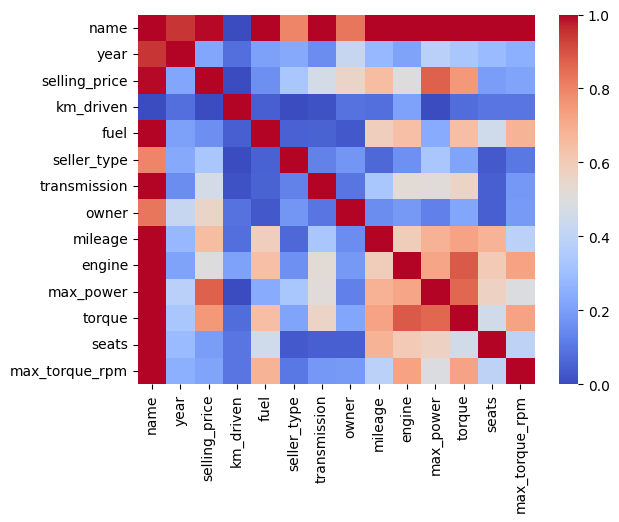

In [52]:
sns.heatmap(df_train.phik_matrix(), cmap='coolwarm', fmt=".2f")

В целом видим похожий результат, что и у пирсона, но можем также наблюдать нелинейность в данных. Также можно оценить корреляцию категориальных признаков, что может быть полезным.

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [53]:
# Нарисовать box_plot и ?

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int64  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


In [55]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm'],
      dtype='object')

In [56]:
X_train = df_train.copy().drop(columns=['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'])
y_train = df_train.copy()['selling_price']

In [57]:
X_train.shape

(5840, 8)

In [58]:
assert X_train.shape == (5840, 8)

In [59]:
X_test = df_test.copy().drop(columns=['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'])
y_test = df_test.copy()['selling_price']

In [60]:
assert X_test.shape == (1000, 8)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE, mean_absolute_error as MAE
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)

pred_train_linreg = pipeline.predict(X_train)
pred_test_linreg = pipeline.predict(X_test)

print(f'MSE for train: {MSE(y_train, pred_train_linreg)}')
print(f'RMSE for train: {np.sqrt(MSE(y_train, pred_train_linreg))}')
print(f'MAE for train: {MAE(y_train, pred_train_linreg)}')
print(f'r2_score for train: {r2_score(y_train, pred_train_linreg)}')

print()
print(f'MSE for test: {MSE(y_test, pred_test_linreg)}')
print(f'RMSE for test: {np.sqrt(MSE(y_test, pred_test_linreg))}')
print(f'MAE for test: {MAE(y_test, pred_test_linreg)}')
print(f'r2_score for test: {r2_score(y_test, pred_test_linreg)}')

MSE for train: 113760955650.43443
RMSE for train: 337284.68042654183
MAE for train: 180238.60127773386
r2_score for train: 0.6031202375015288

MSE for test: 229170865019.83914
RMSE for test: 478717.9388949605
MAE for test: 221119.8518240184
r2_score for test: 0.6013231027374655


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [63]:
def my_r2(y, predict):
  y_mean = y.mean()

  sum_y = ((y - y_mean)**2).sum()
  sum_pedict = ((y - predict)**2).sum()

  return 1 - (sum_pedict / sum_y)


print(f'my r2_score for train: {my_r2(y_train, pred_train_linreg)}')
print(f'sklearn r2_score for train: {r2_score(y_train, pred_train_linreg)}')
print()
print(f'my r2_score for test: {my_r2(y_test, pred_test_linreg)}')
print(f'sklearn r2_score for test: {r2_score(y_test, pred_test_linreg)}')

my r2_score for train: 0.6031202375015288
sklearn r2_score for train: 0.6031202375015288

my r2_score for test: 0.6013231027374655
sklearn r2_score for test: 0.6013231027374655


Если R2 = 1, то модель идеально предсказывает данные, если она 0, то очень плохо.

sum_pedict - показывает какая у нас ошибка, чем больше тем хуже

sum_y - показывает общую вариацию значений вокруг среднего

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [65]:
def adjusted_r2_score(y, pred, X):
  r2 = my_r2(y, pred)

  n, k = y.shape[0], X.shape[1]

  return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [66]:
print(adjusted_r2_score(y_train, pred_train_linreg, X_train))
print(adjusted_r2_score(y_test, pred_test_linreg, X_test))

0.6025757274517967
0.5981047221339334


- Используется, когда много признаков по сравнению с наблюдениями, в таких случаях r2 может завышать качество модели
- при переобучении

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X_train.select_dtypes(include='number').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)

pred_train_linreg_stscaler = pipeline.predict(X_train)
pred_test_linreg_stscaler = pipeline.predict(X_test)

print(f'MSE for train: {MSE(y_train, pred_train_linreg_stscaler)}')
print(f'RMSE for train: {np.sqrt(MSE(y_train, pred_train_linreg_stscaler))}')
print(f'MAE for train: {MAE(y_train, pred_train_linreg_stscaler)}')
print(f'r2_score for train: {r2_score(y_train, pred_train_linreg_stscaler)}')

print()
print(f'MSE for test: {MSE(y_test, pred_test_linreg_stscaler)}')
print(f'RMSE for test: {np.sqrt(MSE(y_test, pred_test_linreg_stscaler))}')
print(f'MAE for test: {MAE(y_test, pred_test_linreg_stscaler)}')
print(f'r2_score for test: {r2_score(y_test, pred_test_linreg_stscaler)}')

MSE for train: 113760955650.43452
RMSE for train: 337284.68042654195
MAE for train: 180238.60127773494
r2_score for train: 0.6031202375015285

MSE for test: 229170865019.8295
RMSE for test: 478717.93889495044
MAE for test: 221119.8518240127
r2_score for test: 0.6013231027374824


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [68]:
model = pipeline.named_steps['model']
print("Коэффициенты модели:", model.coef_)
print("Интерсепт модели:", model.intercept_)

Коэффициенты модели: [164386.10408797 -49194.06902619 -15224.14252601  17216.82037808
 314885.3010118   28093.05183352 -32398.03978391 -56040.62439478]
Интерсепт модели: 522960.0910958864


In [69]:
X_train.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm'],
      dtype='object')

Самые значимые признаки - max_power (314885.3010118) и year (164386.10408797)

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [70]:
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X_train.select_dtypes(include='number').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', Lasso())
])

pipeline.fit(X_train, y_train)

pred_train_lasso = pipeline.predict(X_train)
pred_test_lasso = pipeline.predict(X_test)

print(f'MSE for train: {MSE(y_train, pred_train_lasso)}')
print(f'RMSE for train: {np.sqrt(MSE(y_train, pred_train_lasso))}')
print(f'MAE for train: {MAE(y_train, pred_train_lasso)}')
print(f'r2_score for train: {r2_score(y_train, pred_train_lasso)}')

print()
print(f'MSE for test: {MSE(y_test, pred_test_lasso)}')
print(f'RMSE for test: {np.sqrt(MSE(y_test, pred_test_lasso))}')
print(f'MAE for test: {MAE(y_test, pred_test_lasso)}')
print(f'r2_score for test: {r2_score(y_test, pred_test_lasso)}')

MSE for train: 113760955664.58986
RMSE for train: 337284.6804475262
MAE for train: 180238.0340812891
r2_score for train: 0.6031202374521446

MSE for test: 229171602931.1967
RMSE for test: 478718.7096105569
MAE for test: 221119.5279917647
r2_score for test: 0.6013218190306102


In [71]:
model = pipeline.named_steps['model']
print("Коэффициенты модели:", model.coef_)
print("Интерсепт модели:", model.intercept_)

Коэффициенты модели: [164383.71133927 -49193.14071862 -15220.59442474  17215.12096773
 314885.77609331  28093.60197703 -32394.13300046 -56037.98447545]
Интерсепт модели: 522960.0910958864


Может занулить признаки если они сильно коррелируют, у нас же не такая ситуация

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [72]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
}


pipeline_lasso = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', Lasso())
])

grid_search = GridSearchCV(
    estimator=pipeline_lasso,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['model__alpha']


print(f"Оптимальный коэффициент регуляризации (alpha): {best_alpha}")
print(best_model.named_steps['model'].coef_)

Оптимальный коэффициент регуляризации (alpha): 1000
[162027.61547655 -48251.58898456 -11746.61012772  15388.75745153
 315440.96093768  28605.27323349 -28465.53092989 -53453.56550983]


- Жадный поиск обучил для каждого alpha 10 моделей (так как у нас кросвалидация и мы обучаем несколько моделей) итого 90 моделей
- Каждый параметр:
  - все возможные альфы
  - cv - количество фолдов в кросвалидации
  - scoring - метрика которую мы учитываем для сравнения оптимальной alpha

Никакие веса не занулились

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [73]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
}


pipeline_elasticnet = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', ElasticNet())
])

grid_search = GridSearchCV(
    estimator=pipeline_elasticnet,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['model__alpha']


print(f"Оптимальный коэффициент регуляризации (alpha): {best_alpha}")
print(best_model.named_steps['model'].coef_)

Оптимальный коэффициент регуляризации (alpha): 0.01
[163106.32328713 -49330.04718413 -14591.69194381  20071.48227574
 308642.2674209   32544.69143836 -33000.10980015 -53336.24599256]


- Грид серч обучил 90 моделей
- оптимальная alpha = 0.01

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [74]:
num_features = X_train.select_dtypes(include='number').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features)
    ]
)

model = LinearRegression()

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', model)
])

pipeline.fit(X_train, y_train)

def l0_regularization(X_train, y_train, X_test, y_test, max_nonzero_coefs):
    coefs = pipeline.named_steps['model'].coef_
    features = num_features

    while len(features) > max_nonzero_coefs:
        min_coef_index = np.argmin(np.abs(coefs))
        least_significant_feature = features[min_coef_index]

        features.remove(least_significant_feature)
        X_train_reduced = X_train[features]
        X_test_reduced = X_test[features]

        pipeline.fit(X_train_reduced, y_train)
        coefs = pipeline.named_steps['model'].coef_

        pred_train = pipeline.predict(X_train_reduced)
        pred_test = pipeline.predict(X_test_reduced)


        print(f"Features: {features}")
        print(f'MSE for train: {MSE(y_train, pred_train)}')
        # print(f'RMSE for train: {np.sqrt(MSE(y_train, pred_train))}')
        # print(f'MAE for train: {MAE(y_train, pred_train)}')
        print(f'r2_score for train: {r2_score(y_train, pred_train)}')
        print()
        print(f'MSE for test: {MSE(y_test, pred_test)}')
        # print(f'RMSE for test: {np.sqrt(MSE(y_test, pred_test))}')
        # print(f'MAE for test: {MAE(y_test, pred_test)}')
        print(f'r2_score for test: {r2_score(y_test, pred_test)}')
        print('-' * 40)

    return pipeline, features

max_nonzero_coefs = 5
final_model, final_features = l0_regularization(X_train, y_train, X_test, y_test, max_nonzero_coefs)

print("Final model coefficients:")
print(final_model.named_steps['model'].coef_)
print("Final features:")
print(final_features)

Features: ['year', 'km_driven', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']
MSE for train: 113852136080.00096
r2_score for train: 0.6028021348007915

MSE for test: 229346853098.29544
r2_score for test: 0.6010169452288832
----------------------------------------
Features: ['year', 'km_driven', 'max_power', 'torque', 'seats', 'max_torque_rpm']
MSE for train: 114010401378.31177
r2_score for train: 0.6022499919882929

MSE for test: 229812846335.52988
r2_score for test: 0.6002062804964798
----------------------------------------
Features: ['year', 'km_driven', 'max_power', 'torque', 'max_torque_rpm']
MSE for train: 114266357819.37946
r2_score for train: 0.6013570324402645

MSE for test: 231835689956.28986
r2_score for test: 0.5966872423399407
----------------------------------------
Final model coefficients:
[155702.49864631 -51179.40794501 329054.73346514  23860.8527756
 -52004.8882288 ]
Final features:
['year', 'km_driven', 'max_power', 'torque', 'max_torque_rpm']


# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [75]:
df_train.copy()['name'].head(5)

0           Maruti Swift Dzire VDI
1     Skoda Rapid 1.5 TDI Ambition
2        Hyundai i20 Sportz Diesel
3           Maruti Swift VXI BSIII
4    Hyundai Xcent 1.2 VTVT E Plus
Name: name, dtype: object

Что можно вытащить из переменной name?
- видим, что каждая машина начинается с бренда - укажем это как отдельную фичу
- добавим count_encoder это позволит модели понять какие модели чаще всего продаются (продаваемые машины скорее всего будут похожи на норм распрделение: много среднего сегмента, мало дорогих)

In [76]:
df_train_cat = df_train.copy()

df_train_cat['brand'] = df_train_cat['name'].apply(lambda x: x.split()[0])
df_train_cat['brand_count_encoded'] = df_train_cat['name'].map(df_train_cat['name'].value_counts())
df_train_cat = df_train_cat.drop(columns=['name'])

df_test_cat = df_test.copy()

df_test_cat['brand'] = df_test_cat['name'].apply(lambda x: x.split()[0])
df_test_cat['brand_count_encoded'] = df_test_cat['name'].map(df_test_cat['name'].value_counts())
df_test_cat = df_test_cat.drop(columns=['name'])

In [77]:
X_train_cat = df_train_cat.copy().drop(columns=['selling_price'])
y_train_cat = df_train_cat.copy()['selling_price']

X_test_cat = df_test_cat.copy().drop(columns=['selling_price'])
y_test_cat = df_test_cat.copy()['selling_price']

In [78]:
X_train_cat.head()

year  km_driven    fuel seller_type transmission         owner  mileage  \
0  2014     145500  Diesel  Individual       Manual   First Owner    23.40   
1  2014     120000  Diesel  Individual       Manual  Second Owner    21.14   
2  2010     127000  Diesel  Individual       Manual   First Owner    23.00   
3  2007     120000  Petrol  Individual       Manual   First Owner    16.10   
4  2017      45000  Petrol  Individual       Manual   First Owner    20.14   

   engine  max_power     torque  seats  max_torque_rpm    brand  \
0    1248      74.00  190.00000      5          2000.0   Maruti   
1    1498     103.52  250.00000      5          2500.0    Skoda   
2    1396      90.00  219.66896      5          2750.0  Hyundai   
3    1298      88.20   11.50000      5          4500.0   Maruti   
4    1197      81.86  113.75000      5          4000.0  Hyundai   

   brand_count_encoded  
0                   91  
1                    3  
2                    1  
3                    2  
4                    2

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [79]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# ohe = OneHotEncoder(drop='first')
# X_train_ohe = ohe.fit_transform(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'brand', 'seats']])
# X_test_ohe = ohe.transform(X_test_cat[['fuel', 'seller_type', 'transmission', 'owner', 'brand', 'seats']])

Не выполняю ячейки кода т к у меня это все будет в пайпе

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

Ответ
- Можно обработать вручную, но я предпочитаю работать через пайплайн, это удобнее.
- Мы удаляем один столбец, так модель и так знает, что в последнем столбце по всем остальным, также это позволит избавить от линейной зависимости
- В целом их можно удалить, но я бы не стал так делать, модели все-таки может быть важно находить там какую-то инфу

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

Для начала обучим дефолтным методом и видим, что прогноз улучшился

In [80]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_features = X_train_cat.select_dtypes(include='number').drop(columns='seats').columns.tolist()
cat_features = X_train_cat.drop(columns=['year', 'km_driven', 'mileage', 'engine', 'max_power', 'max_torque_rpm','torque', 'brand_count_encoded']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', Ridge())
])

pipeline.fit(X_train_cat, y_train_cat)

pred_train_ridge_ohe = pipeline.predict(X_train_cat)
pred_test_ridge_ohe = pipeline.predict(X_test_cat)

print(f'MSE for train: {MSE(y_train_cat, pred_train_ridge_ohe)}')
print(f'RMSE for train: {np.sqrt(MSE(y_train_cat, pred_train_ridge_ohe))}')
print(f'MAE for train: {MAE(y_train_cat, pred_train_ridge_ohe)}')
print(f'r2_score for train: {r2_score(y_train_cat, pred_train_ridge_ohe)}')

print()
print(f'MSE for test: {MSE(y_test_cat, pred_test_ridge_ohe)}')
print(f'RMSE for test: {np.sqrt(MSE(y_test_cat, pred_test_ridge_ohe))}')
print(f'MAE for test: {MAE(y_test_cat, pred_test_ridge_ohe)}')
print(f'r2_score for test: {r2_score(y_test_cat, pred_test_ridge_ohe)}')

MSE for train: 64774832491.76143
RMSE for train: 254509.00277153542
MAE for train: 135700.9656211166
r2_score for train: 0.7740189506300938

MSE for test: 123854985067.93025
RMSE for test: 351930.369630031
MAE for test: 164951.17504076584
r2_score for test: 0.7845357822727363


In [81]:
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.model_selection import GridSearchCV


num_features = X_train_cat.select_dtypes(include='number').drop(columns='seats').columns.tolist()
cat_features = X_train_cat.drop(columns=['year', 'km_driven', 'mileage', 'engine', 'max_power', 'max_torque_rpm','torque', 'brand_count_encoded']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
}


pipeline_ridge = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', Ridge())
])

grid_search = GridSearchCV(
    estimator=pipeline_ridge,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train_cat, y_train_cat)

best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['model__alpha']


print(f"Оптимальный коэффициент регуляризации (alpha): {best_alpha}")
print(best_model.named_steps['model'].coef_)

Оптимальный коэффициент регуляризации (alpha): 0.001
[ 1.63684756e+05 -2.80929913e+04  8.26277488e+03  2.83893640e+04
  1.69824191e+05  5.00257460e+04 -2.98449809e+04  1.91248659e+03
 -6.90072218e+04 -2.64395100e+04  1.06818792e+05 -1.13720605e+04
  2.73857146e+04 -2.81818157e+04  7.96101065e+02  3.71122468e+04
 -3.71122468e+04 -6.13631251e+05 -6.53261367e+05 -6.70037874e+05
  2.58849857e+06 -6.51568082e+05 -2.75776135e+04  3.08447169e+05
 -7.03120415e+04 -1.21035161e+05 -1.40937730e+03 -4.79955313e+04
 -1.49984779e+04  8.02419872e+04 -1.05360954e+05 -5.37944198e+04
  2.90758143e+05  9.54732519e+05 -6.01332633e+05 -8.67329950e+04
 -6.20979637e+05 -5.91289429e+05 -5.61909355e+05 -5.08273016e+05
 -5.08774330e+05 -4.87224113e+05 -2.06653834e+04  6.27505317e+05
  4.22139829e+04 -1.25387570e+05  1.04337556e+06  3.09274050e+06
  1.04037658e+05 -5.38860676e+05 -4.57947886e+05  5.45328527e+05
 -2.03353220e+05 -5.33485548e+05 -1.20018709e+05 -5.41824005e+05
 -5.30094692e+05 -6.08927283e+05 -2.1

Нашли оптимальный коэф регуляризации и еще раз обучим модель

In [82]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_features = X_train_cat.select_dtypes(include='number').drop(columns='seats').columns.tolist()
cat_features = X_train_cat.drop(columns=['year', 'km_driven', 'mileage', 'engine', 'max_power', 'max_torque_rpm','torque', 'brand_count_encoded']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', Ridge(alpha=0.001))
])

pipeline.fit(X_train_cat, y_train_cat)

pred_train_optimal_ridge_ohe = pipeline.predict(X_train_cat)
pred_test_optimal_ridge_ohe = pipeline.predict(X_test_cat)

print(f'MSE for train: {MSE(y_train_cat, pred_train_optimal_ridge_ohe)}')
print(f'RMSE for train: {np.sqrt(MSE(y_train_cat, pred_train_optimal_ridge_ohe))}')
print(f'MAE for train: {MAE(y_train_cat, pred_train_optimal_ridge_ohe)}')
print(f'r2_score for train: {r2_score(y_train_cat, pred_train_optimal_ridge_ohe)}')

print()
print(f'MSE for test: {MSE(y_test_cat, pred_test_optimal_ridge_ohe)}')
print(f'RMSE for test: {np.sqrt(MSE(y_test_cat, pred_test_optimal_ridge_ohe))}')
print(f'MAE for test: {MAE(y_test_cat, pred_test_optimal_ridge_ohe)}')
print(f'r2_score for test: {r2_score(y_test_cat, pred_test_optimal_ridge_ohe)}')

MSE for train: 63975964358.78887
RMSE for train: 252934.70374543086
MAE for train: 134097.31342383765
r2_score for train: 0.7768059753440563

MSE for test: 120443604004.88904
RMSE for test: 347049.85809662717
MAE for test: 159982.95575490445
r2_score for test: 0.7904703883906463


- Видим, что метрики улучшились, но не очень сильно

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [83]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [84]:
def business_metrics(y_true, y_pred):

  abs_diff = np.abs(y_true - y_pred)
  max_dif = 0.1*y_true

  return (abs_diff <= max_dif).sum() / len(y_pred)


In [85]:
# Найдем оптимальную модель для метрики business_metrics

models_predictions = [(pred_train_linreg, pred_test_linreg),
                      (pred_train_linreg_stscaler, pred_test_linreg_stscaler),
                      (pred_train_lasso, pred_test_lasso),
                      (pred_train_ridge_ohe, pred_test_ridge_ohe),
                      (pred_train_optimal_ridge_ohe, pred_test_optimal_ridge_ohe)]

def all_models_metrics(models_predictions, y_train, y_test):
  for pred_train, pred_test in models_predictions:
    print(f'Доля предсказанных машин отличающихся максимум на 10% на трейне {business_metrics(y_train, pred_train):.2%}')
    print(f'Доля предсказанных машин отличающихся максимум на 10% на тесте {business_metrics(y_test, pred_test):.2%}')
    print()

all_models_metrics(models_predictions, y_train, y_test)

Доля предсказанных машин отличающихся максимум на 10% на трейне 22.16%
Доля предсказанных машин отличающихся максимум на 10% на тесте 24.50%

Доля предсказанных машин отличающихся максимум на 10% на трейне 22.16%
Доля предсказанных машин отличающихся максимум на 10% на тесте 24.50%

Доля предсказанных машин отличающихся максимум на 10% на трейне 22.16%
Доля предсказанных машин отличающихся максимум на 10% на тесте 24.50%

Доля предсказанных машин отличающихся максимум на 10% на трейне 27.47%
Доля предсказанных машин отличающихся максимум на 10% на тесте 31.10%

Доля предсказанных машин отличающихся максимум на 10% на трейне 28.08%
Доля предсказанных машин отличающихся максимум на 10% на тесте 31.60%



Видим, что оптимальная модель - со всеми фичами (ohe и стандартизацией) и оптимальным гиперпараметров ridge

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [86]:
def your_business_metrics(y_true, y_pred):
  under_weight = 2
  over_weight = 1
  dif = y_true - y_pred
  weight = np.where(dif > 0, under_weight, over_weight)

  return np.mean(weight * (np.abs(dif)))

In [87]:
# Найдем оптимальную модель для метрики business_metrics

models_predictions = [(pred_train_linreg, pred_test_linreg),
                      (pred_train_linreg_stscaler, pred_test_linreg_stscaler),
                      (pred_train_lasso, pred_test_lasso),
                      (pred_train_ridge_ohe, pred_test_ridge_ohe),
                      (pred_train_optimal_ridge_ohe, pred_test_optimal_ridge_ohe)]

def all_models_metrics(models_predictions, y_train, y_test):
  for pred_train, pred_test in models_predictions:
    print(f'MAE учитывающая отрицательные значения в 2 раза сильнее на трейне {your_business_metrics(y_train, pred_train)}')
    print(f'MAE учитывающая отрицательные значения в 2 раза сильнее на тесте {your_business_metrics(y_test, pred_test)}')
    print()

all_models_metrics(models_predictions, y_train, y_test)

MAE учитывающая отрицательные значения в 2 раза сильнее на трейне 270357.9019165911
MAE учитывающая отрицательные значения в 2 раза сильнее на тесте 358352.8247005631

MAE учитывающая отрицательные значения в 2 раза сильнее на трейне 270357.90191660245
MAE учитывающая отрицательные значения в 2 раза сильнее на тесте 358352.8247005624

MAE учитывающая отрицательные значения в 2 раза сильнее на трейне 270357.0511219337
MAE учитывающая отрицательные значения в 2 раза сильнее на тесте 358352.44838181435

MAE учитывающая отрицательные значения в 2 раза сильнее на трейне 203551.448431675
MAE учитывающая отрицательные значения в 2 раза сильнее на тесте 259975.36390319318

MAE учитывающая отрицательные значения в 2 раза сильнее на трейне 201145.97013575656
MAE учитывающая отрицательные значения в 2 раза сильнее на тесте 248778.85775312706



In [88]:
# Скачаем пикл модели для следующего использования через FastAPI
!pip install joblib

import joblib

joblib.dump(pipeline, 'model_pipeline.pkl')

['model_pipeline.pkl']

Также видим, что наша последняя модель показала наилучшие результаты

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [90]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

In [ ]:
import joblib
from fastapi import FastAPI, HTTPException, File, UploadFile
from pydantic import BaseModel
from typing import List, Dict, Any
import pandas as pd
from io import StringIO
import re
import sklearn
app = FastAPI()

def preprocessor_df(df_test):

    df_test.drop(columns='selling_price', inplace=True)

    def to_num(df, column_name, units):
        for i in units:
            df[column_name] = df[column_name].str.replace(f' {i}', '')

        df[column_name] = pd.to_numeric(df[column_name])
        return df

    df_test = to_num(df_test, 'max_power', ['bhp'])
    df_test = to_num(df_test, 'engine', ['CC'])
    df_test = to_num(df_test, 'mileage', ['kmpl', 'km/kg'])

    def process_torque(df):
        torque_vals = []
        rpm_vals = []

        for i in df['torque']:
            if pd.isna(i):
                torque_vals.append(i)
                rpm_vals.append(i)
                continue

            elif not isinstance(i, str):
                print(i)
                torque_vals.append(None)
                rpm_vals.append(None)
                continue

            i = i.replace(',', '')

            torque_match = re.search(r"(\d+(\.\d+)?)\s*(Nm|kgm|)", i, re.IGNORECASE)

            if torque_match:
                torque_value = float(torque_match.group(1))
                unit = torque_match.group(3).lower()

                if unit == 'kgm':
                    torque_value *= 9.80665
                    # 1 kgm ≈ 9.80665 Nm
            else:
                torque_value = None

            rpm_match = re.search(r"@ (\d{1,4})(?:-(\d{1,4}))?\s?(rpm\s?|\(kgm@ rpm\)\s?)", i)
            fallback_match = re.search(r"(\d{1,4})\s?(rpm|RPM)?\s*$", i)

            if fallback_match:
                rpm = fallback_match.group(1)

            elif rpm_match:
                if rpm_match.group(2):
                    rpm = rpm_match.group(2)
                else:
                    rpm = rpm_match.group(1)

            else:
                rpm = None

            torque_vals.append(torque_value)
            rpm_vals.append(rpm)

        df['torque'] = torque_vals
        df['max_torque_rpm'] = rpm_vals
        return df

    df_test = process_torque(df_test.copy())
    df_test['torque'] = pd.to_numeric(df_test['torque'])
    df_test['max_torque_rpm'] = pd.to_numeric(df_test['max_torque_rpm'])

    medians = df_test[['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']].median()
    df_test.fillna(medians, inplace=True)

    df_test['engine'] = df_test['engine'].astype('int')
    df_test['seats'] = df_test['seats'].astype('int')

    df_test['brand'] = df_test['name'].apply(lambda x: x.split()[0])
    df_test['brand_count_encoded'] = df_test['name'].map(df_test['name'].value_counts())

    df_test = df_test.drop(columns=['name'])

    return df_test

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]

pipeline = joblib.load('model_pipeline.pkl')

@app.post("/predict_item")
async def predict_item(item: Item) -> dict:
    try:
        df = pd.DataFrame([item.dict()])
        df_test = preprocessor_df(df)
        prediction = pipeline.predict(df_test)
        return {"prediction": int(prediction[0])}
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

@app.post("/predict_items")
async def predict_items(file: UploadFile = File(...)):
    try:
        df = pd.read_csv(file.file)
        df_test = preprocessor_df(df)
        df_test['predictions'] = pipeline.predict(df_test)

        output = StringIO()
        df_test.to_csv(output, index=False)
        output.seek(0)

        return {"filename": "predictions.csv", "file": output.getvalue()}
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

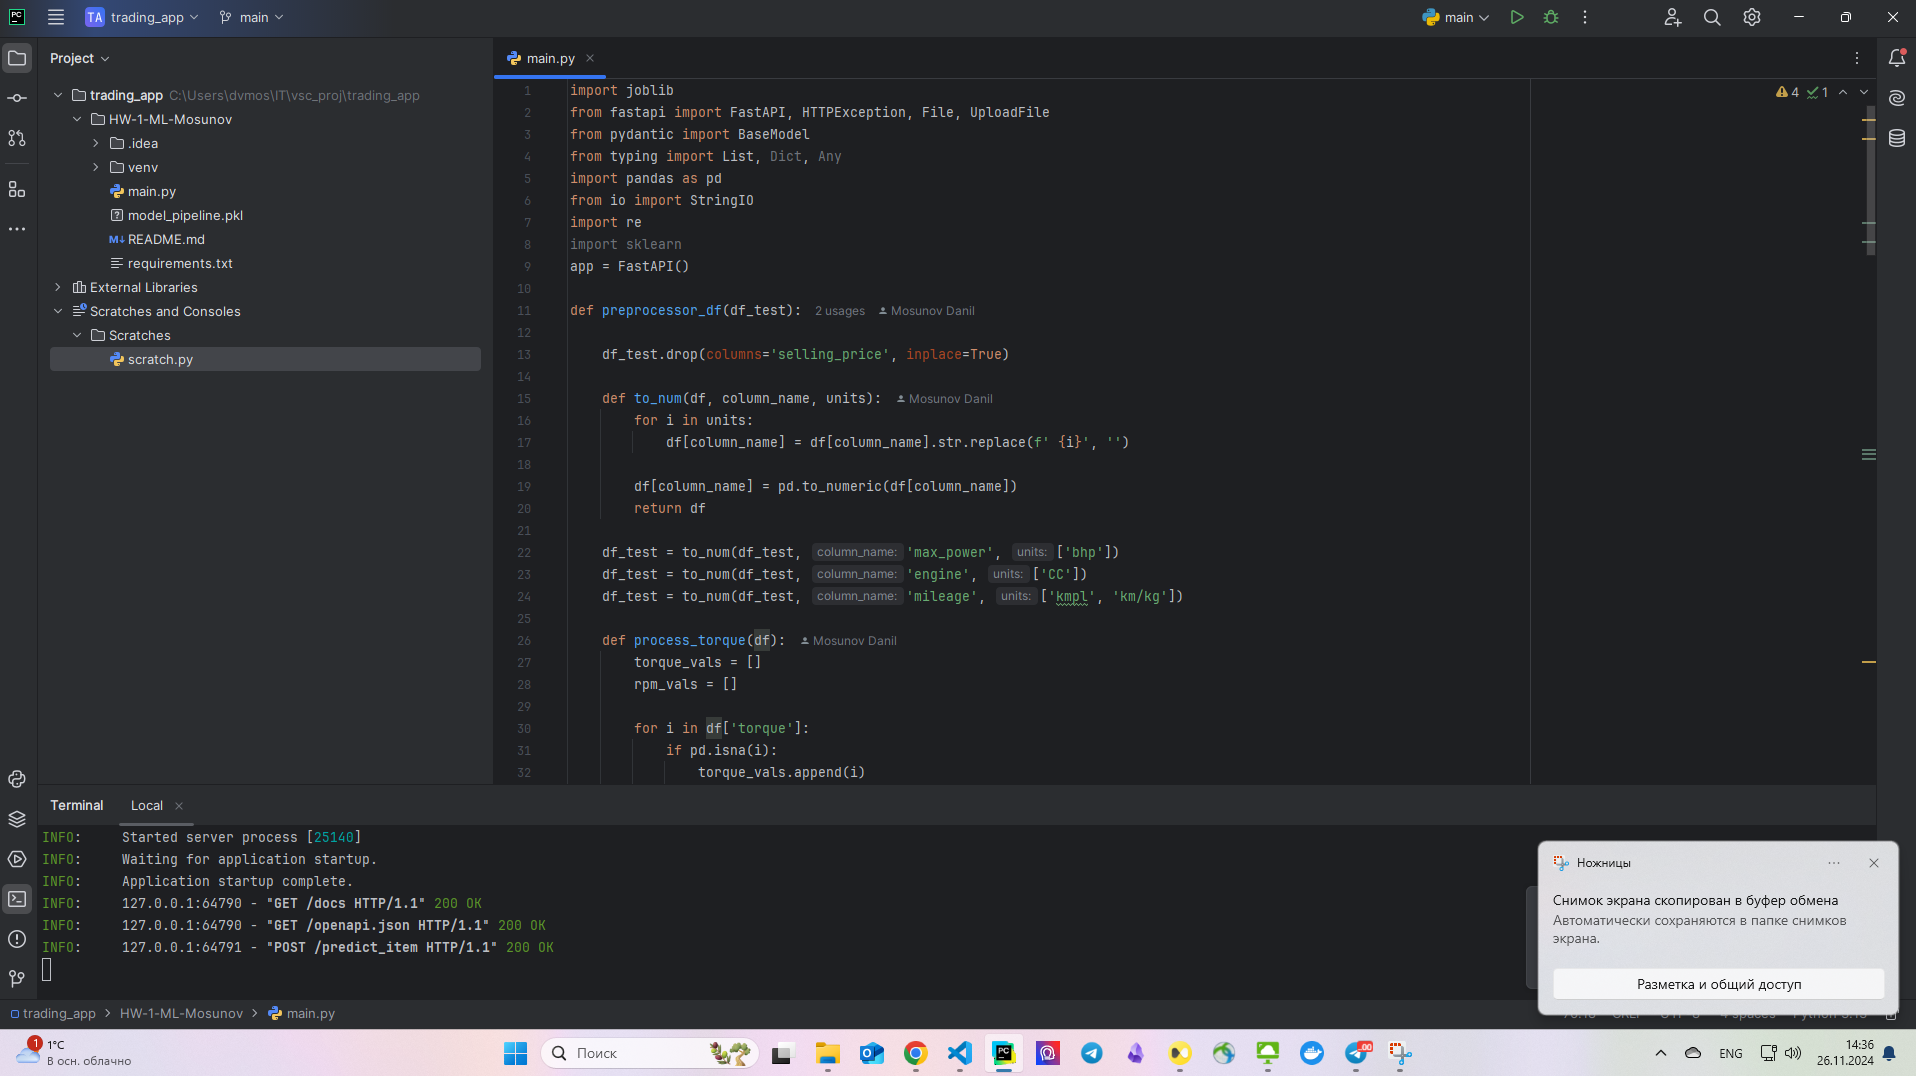

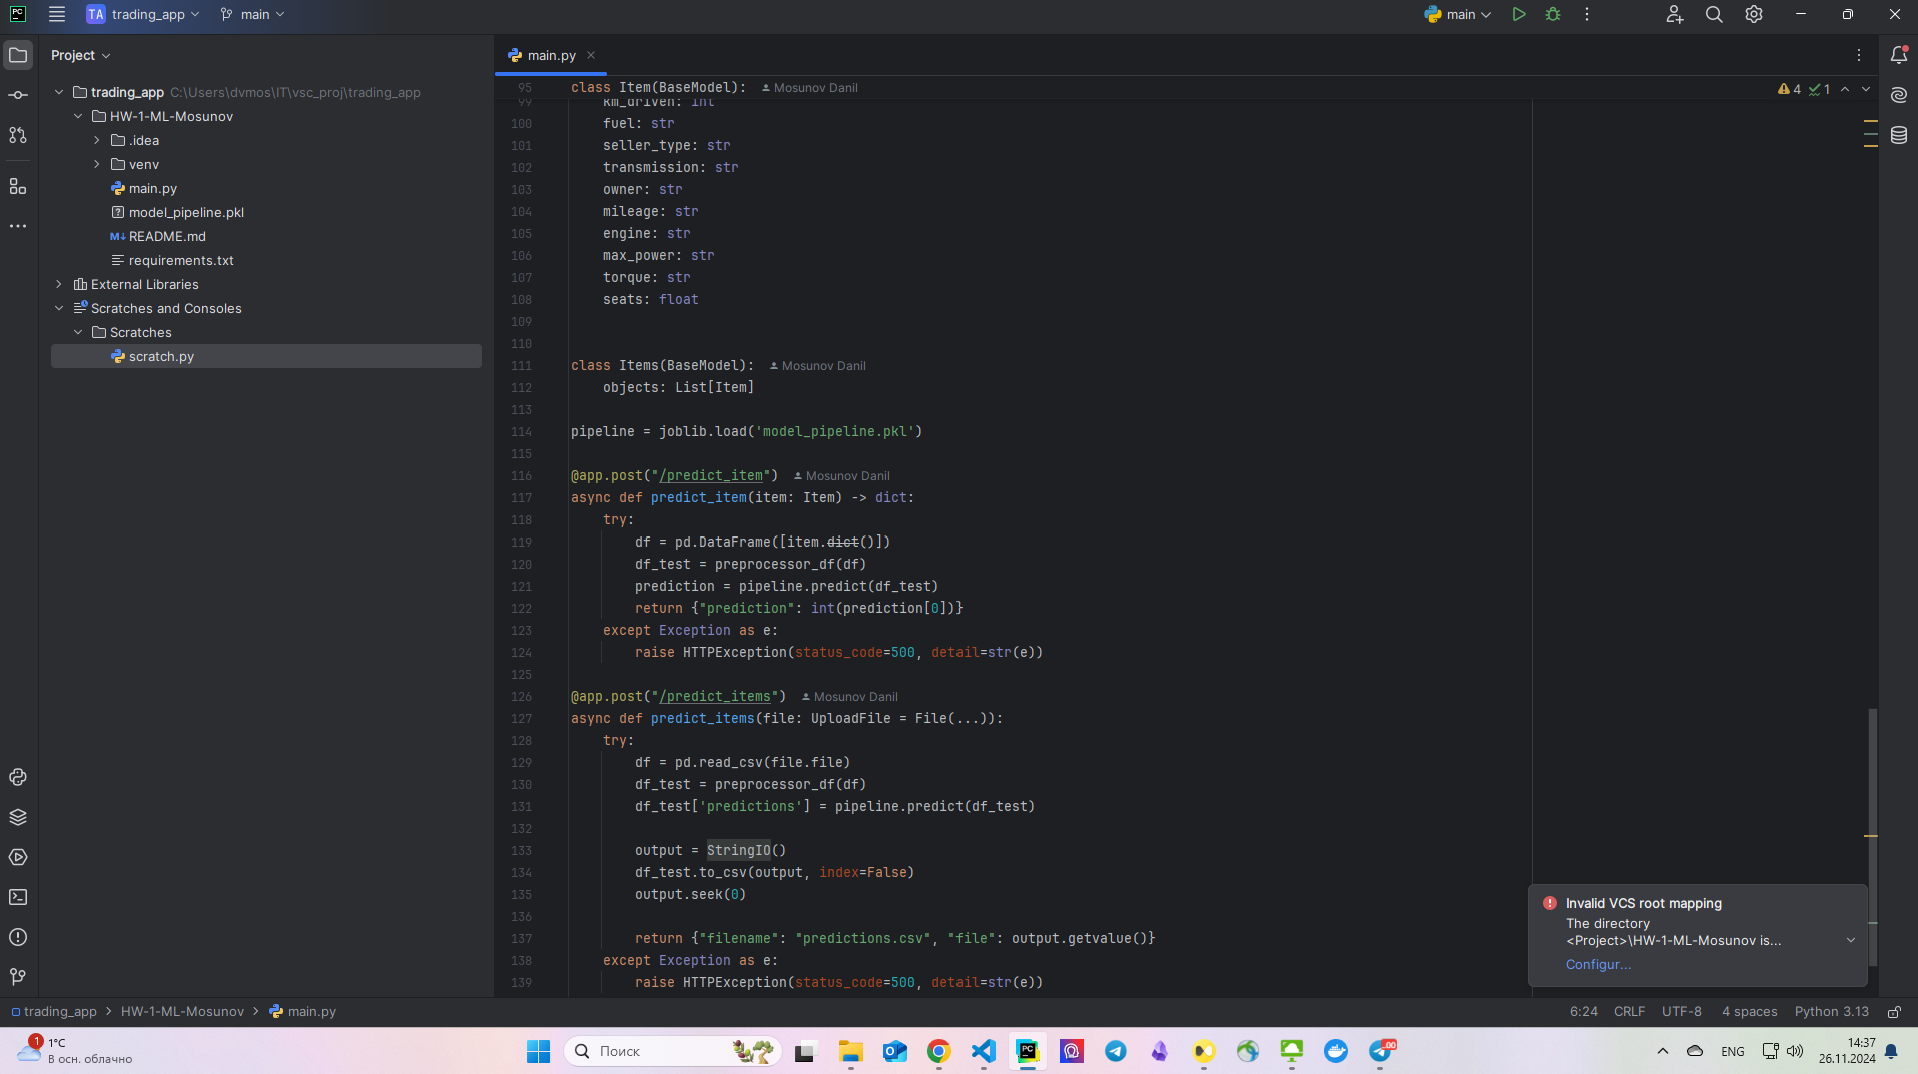

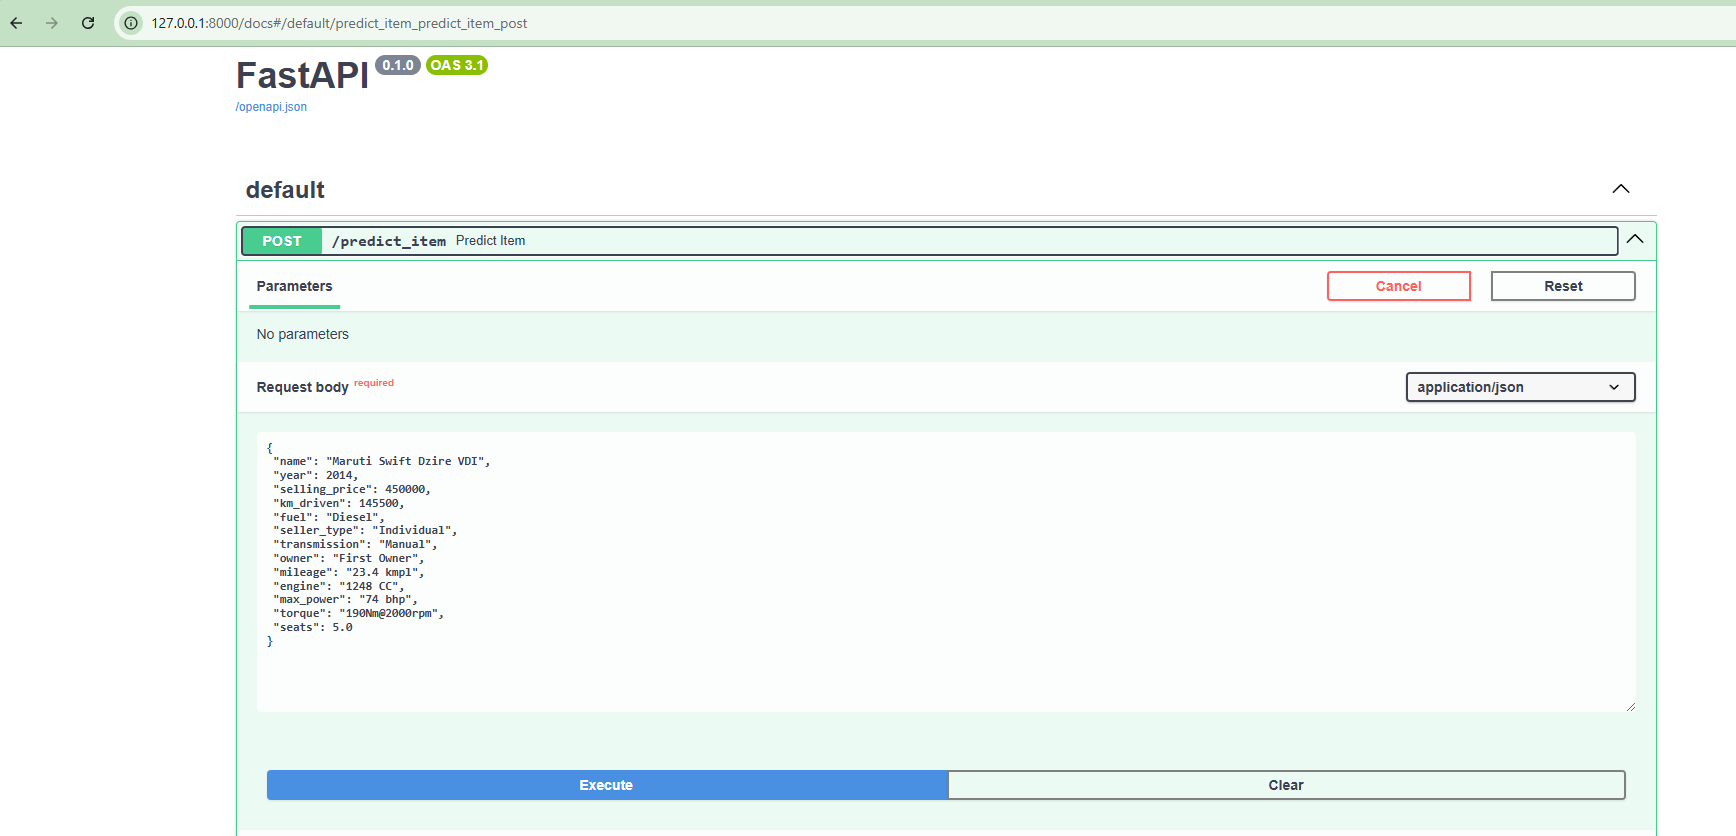

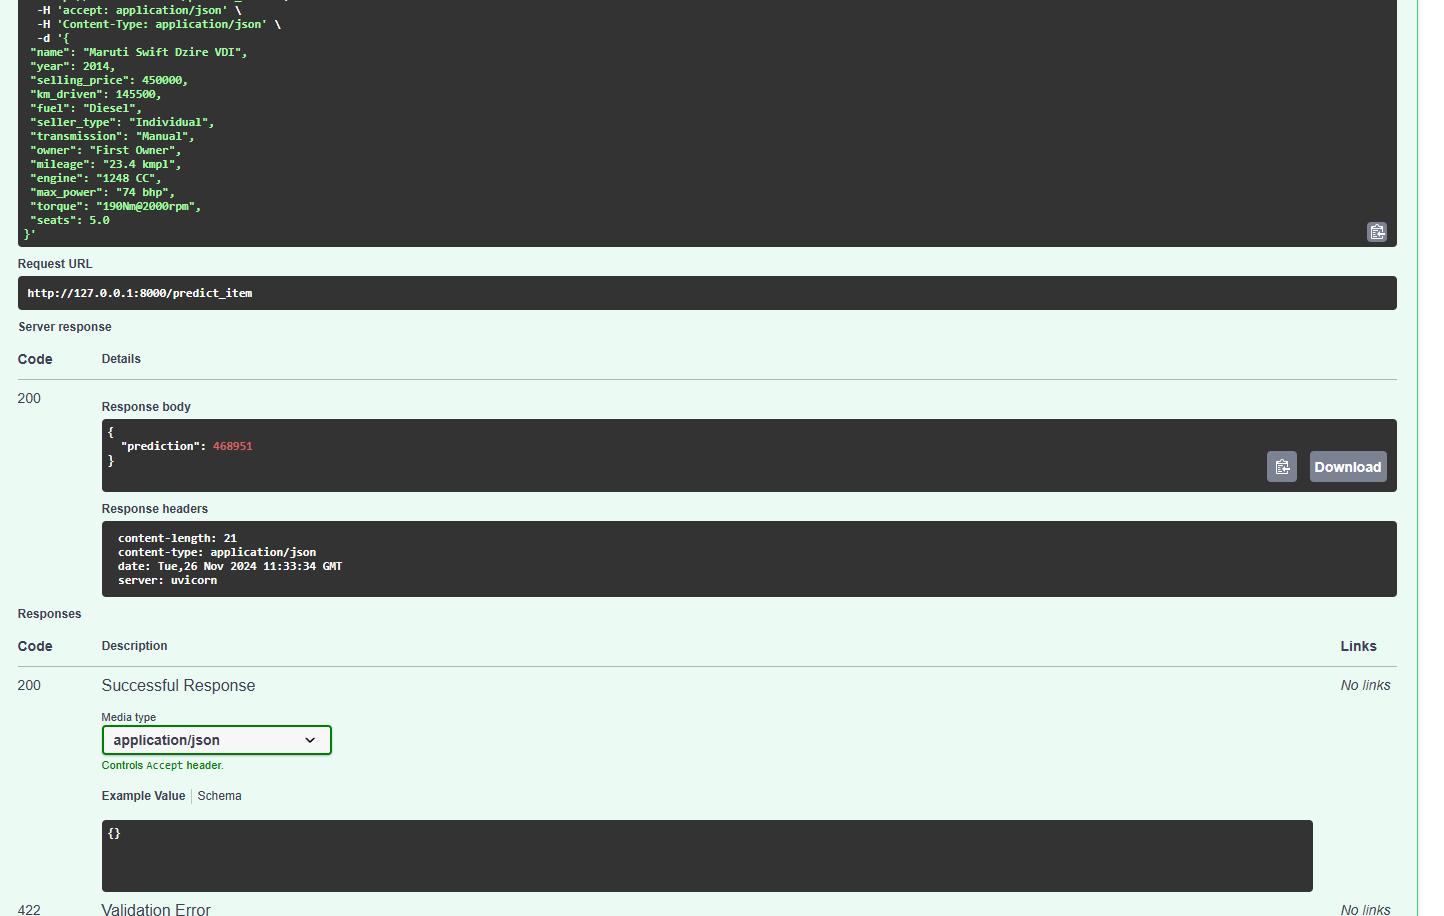

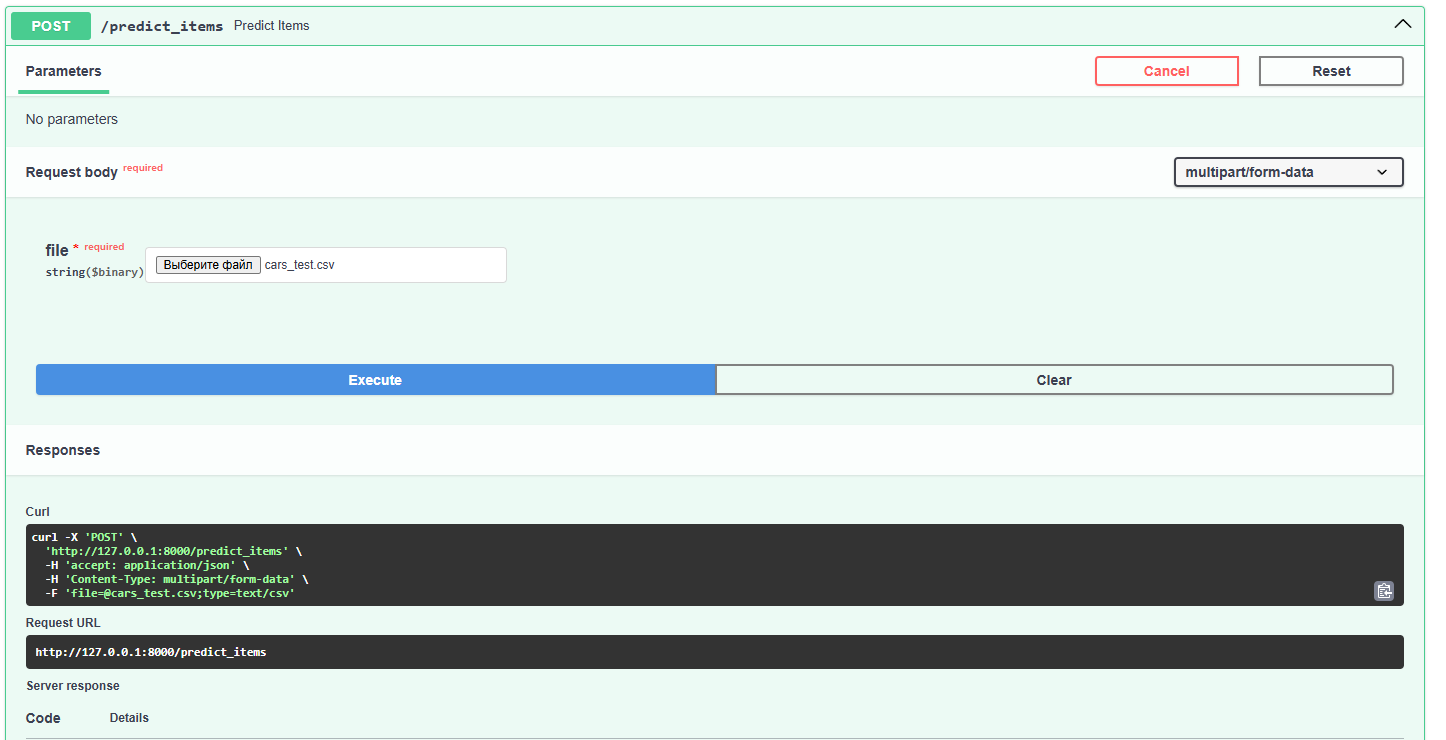

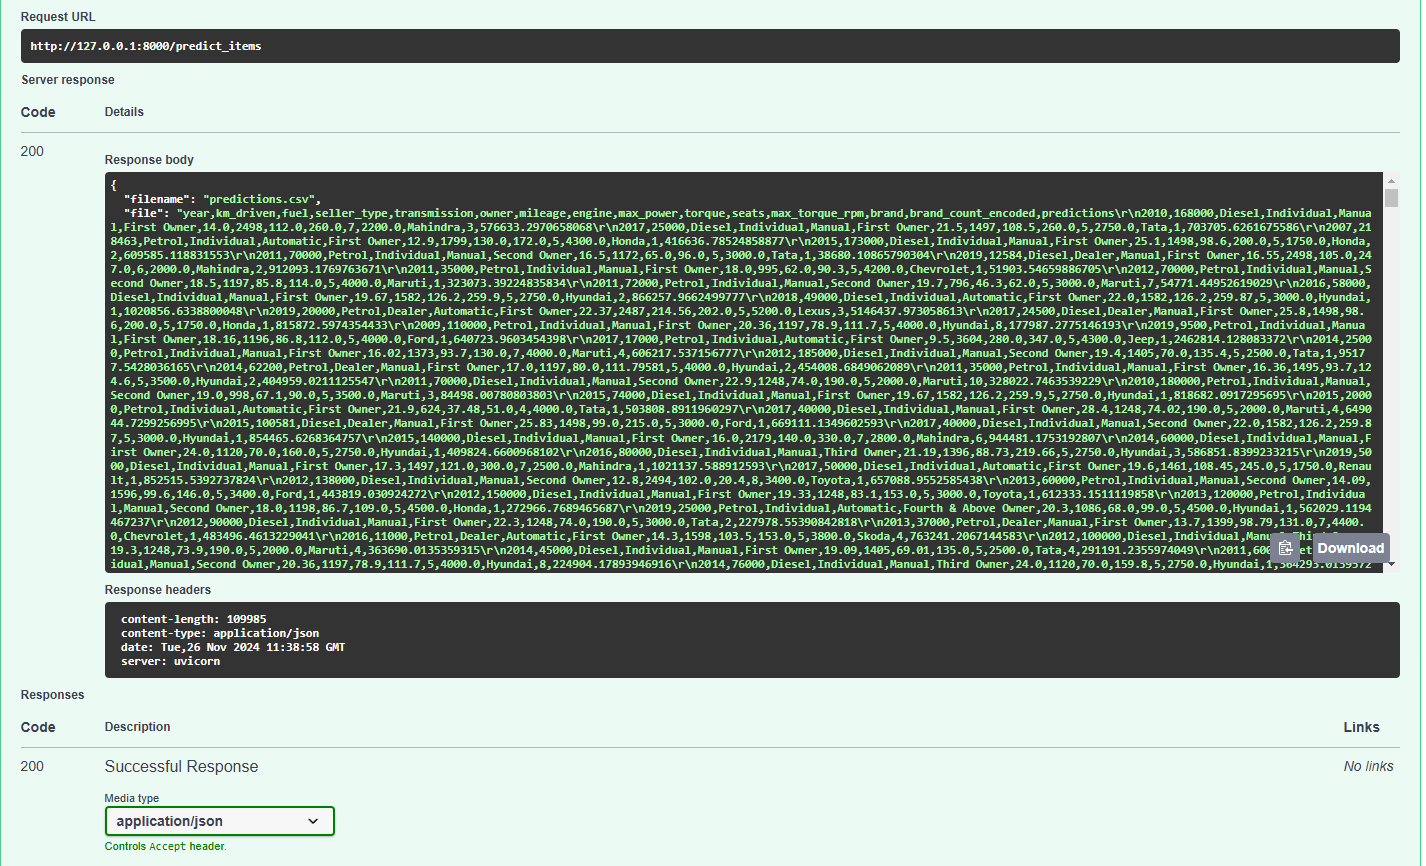

Видим, что обе функции работают
- можно получить прогноз для 1 наблюдения
- можно получать на выходе csv файл с множеством прогнозов

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>

Всем котам привет